In [1]:
# load packages
import pandas as pd
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#test.head()

In [5]:
# seperate the independent and target variable on training data
train_x = train.drop(columns=['admit'],axis=1)
train_y = train['admit']

# seperate the independent and target variable on testing data
test_x = test.drop(columns=['admit'],axis=1)
test_y = test['admit']

In [13]:
test_x.head()

,gre,gpa,rank
0,760,3.00,2
1,540,3.39,3
2,700,3.08,2
3,680,3.19,4
4,620,3.61,1


In [10]:
# Make predictions on validation dataset
model = LogisticRegression()

# fit the model with the training data
model.fit(train_x,train_y)

LogisticRegression()

In [12]:
print('Coefficient of model :', model.coef_)

Coefficient of model : [[ 0.00182961  0.77095448 -0.52419494]]


In [14]:
print('Intercept of model',model.intercept_)

Intercept of model [-3.24768543]


In [15]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on test data [0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 1 0]
accuracy_score on test dataset :  0.7215189873417721


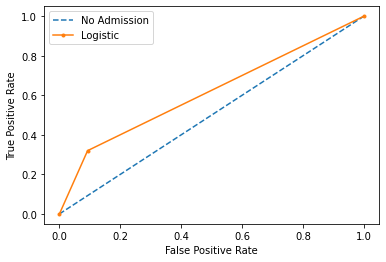

<Figure size 432x288 with 0 Axes>

In [30]:
#ROC and AUC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(test_y))]

# predict probabilities
lr_probs = model.predict(test_x)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Admission')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
fig1 = pyplot.gcf()
pyplot.show()
pyplot.draw()
fig1.savefig('glm_plot.svg', dpi=400) #jpeg, png


In [17]:
# calculate scores
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)

In [19]:
# summarize scores
print('No Admission: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Admission: ROC AUC=0.500
Logistic: ROC AUC=0.614
